In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import random

# Set a random seed for reproducibility
np.random.seed(42)

In [4]:
# Define parameter ranges and step sizes
lch_range = np.arange(15.0, 20.1, 0.1)  # Channel length (nm)
tch_range = np.arange(15.0, 20.1, 0.1)  # Channel thickness (nm)
tox_range = np.arange(1.0, 2.55, 0.05)  # Oxide thickness (nm)
lsd_range = np.arange(10.0, 15.1, 0.1)  # Source/Drain length (nm)

In [5]:
# Placeholder function to generate synthetic performance metrics
def simulate_performance(lch, tch, tox, lsd):
    # Synthetic function to mimic TFET behavior (replace with actual simulation data)
    on_current = (1 / lch) * (tox / tch) * np.exp(-lsd / 10) * random.uniform(0.9, 1.1)
    off_current = (lch / tch) * (tox / lsd) * np.exp(-tox / 2) * random.uniform(0.9, 1.1)
    subthreshold_swing = (lsd / lch) * np.log(tch / tox) * random.uniform(0.9, 1.1)
    
    return on_current, off_current, subthreshold_swing


In [6]:
# Initialize an empty list to store the data
data = []

# Loop over all combinations of parameters
for lch in lch_range:
    for tch in tch_range:
        for tox in tox_range:
            for lsd in lsd_range:
                on_current, off_current, subthreshold_swing = simulate_performance(lch, tch, tox, lsd)
                data.append([lch, tch, tox, lsd, on_current, off_current, subthreshold_swing])

# Convert the list to a DataFrame
columns = ['lch', 'tch', 'tox', 'lsd', 'ON Current (A)', 'OFF Current (A)', 'Subthreshold Swing (mV/dec)']
df = pd.DataFrame(data, columns=columns)

# Display the first few rows of the DataFrame
df.head()


,lch,tch,tox,lsd,ON Current (A),OFF Current (A),Subthreshold Swing (mV/dec)
0,15.0,15.0,1.0,10.0,0.001685,0.058825,1.672933
1,15.0,15.0,1.0,10.1,0.001635,0.056970,1.779350
2,15.0,15.0,1.0,10.2,0.001726,0.058673,1.888614
3,15.0,15.0,1.0,10.3,0.001601,0.054573,1.932421
4,15.0,15.0,1.0,10.4,0.001723,0.062831,1.929245


In [7]:
# Save the DataFrame to a CSV file
df.to_csv('synthetic_tfet_data.csv', index=False)

In [8]:
# Basic statistics
print(df.describe())

                lch           tch           tox           lsd  ON Current (A)  \
count  4.275024e+06  4.275024e+06  4.275024e+06  4.275024e+06    4.275024e+06   
mean   1.755000e+01  1.755000e+01  1.750000e+00  1.250000e+01    1.669941e-03   
std    1.500833e+00  1.500833e+00  4.472136e-01  1.471960e+00    5.493476e-04   
min    1.500000e+01  1.500000e+01  1.000000e+00  1.000000e+01    5.083338e-04   
25%    1.627500e+01  1.627500e+01  1.350000e+00  1.120000e+01    1.245837e-03   
50%    1.755000e+01  1.755000e+01  1.750000e+00  1.250000e+01    1.607905e-03   
75%    1.882500e+01  1.882500e+01  2.150000e+00  1.380000e+01    2.025004e-03   
max    2.010000e+01  2.010000e+01  2.500000e+00  1.500000e+01    4.303558e-03   

       OFF Current (A)  Subthreshold Swing (mV/dec)  
count     4.275024e+06                 4.275024e+06  
mean      5.767224e-02                 1.676542e+00  
std       1.087805e-02                 3.342110e-01  
min       2.773969e-02                 8.225938e-01  


In [9]:
# Check for missing values
print(df.isnull().sum())

lch                            0
tch                            0
tox                            0
lsd                            0
ON Current (A)                 0
OFF Current (A)                0
Subthreshold Swing (mV/dec)    0
dtype: int64


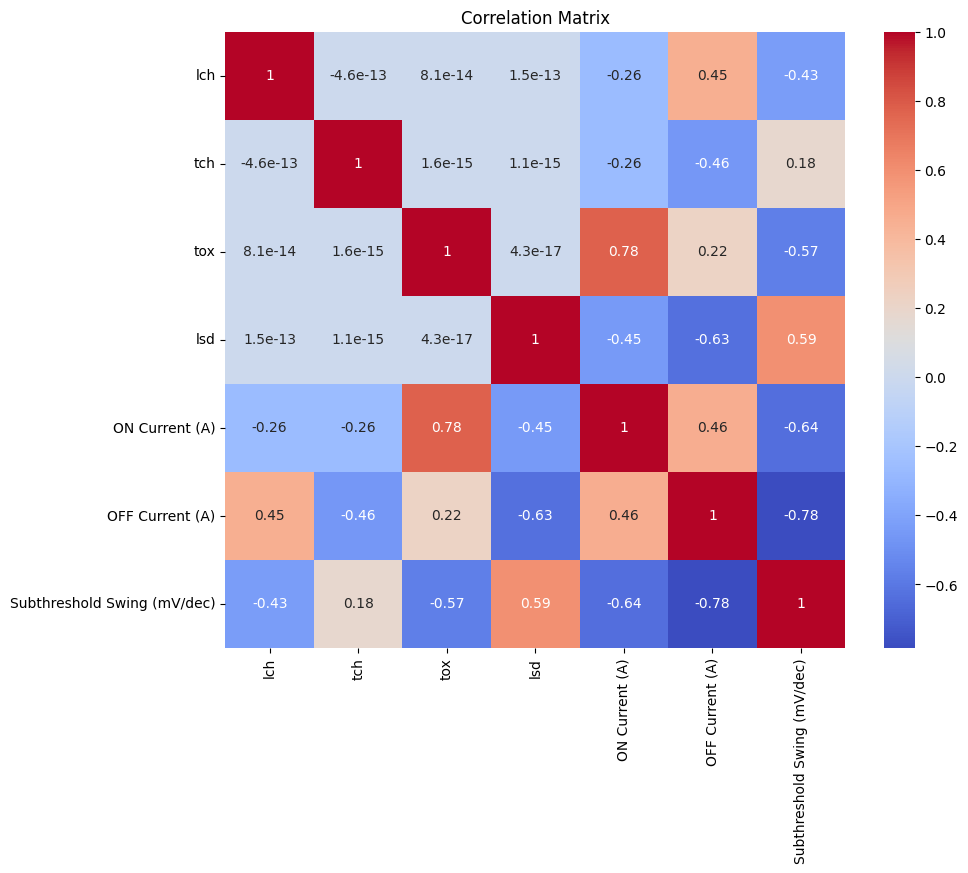

In [10]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

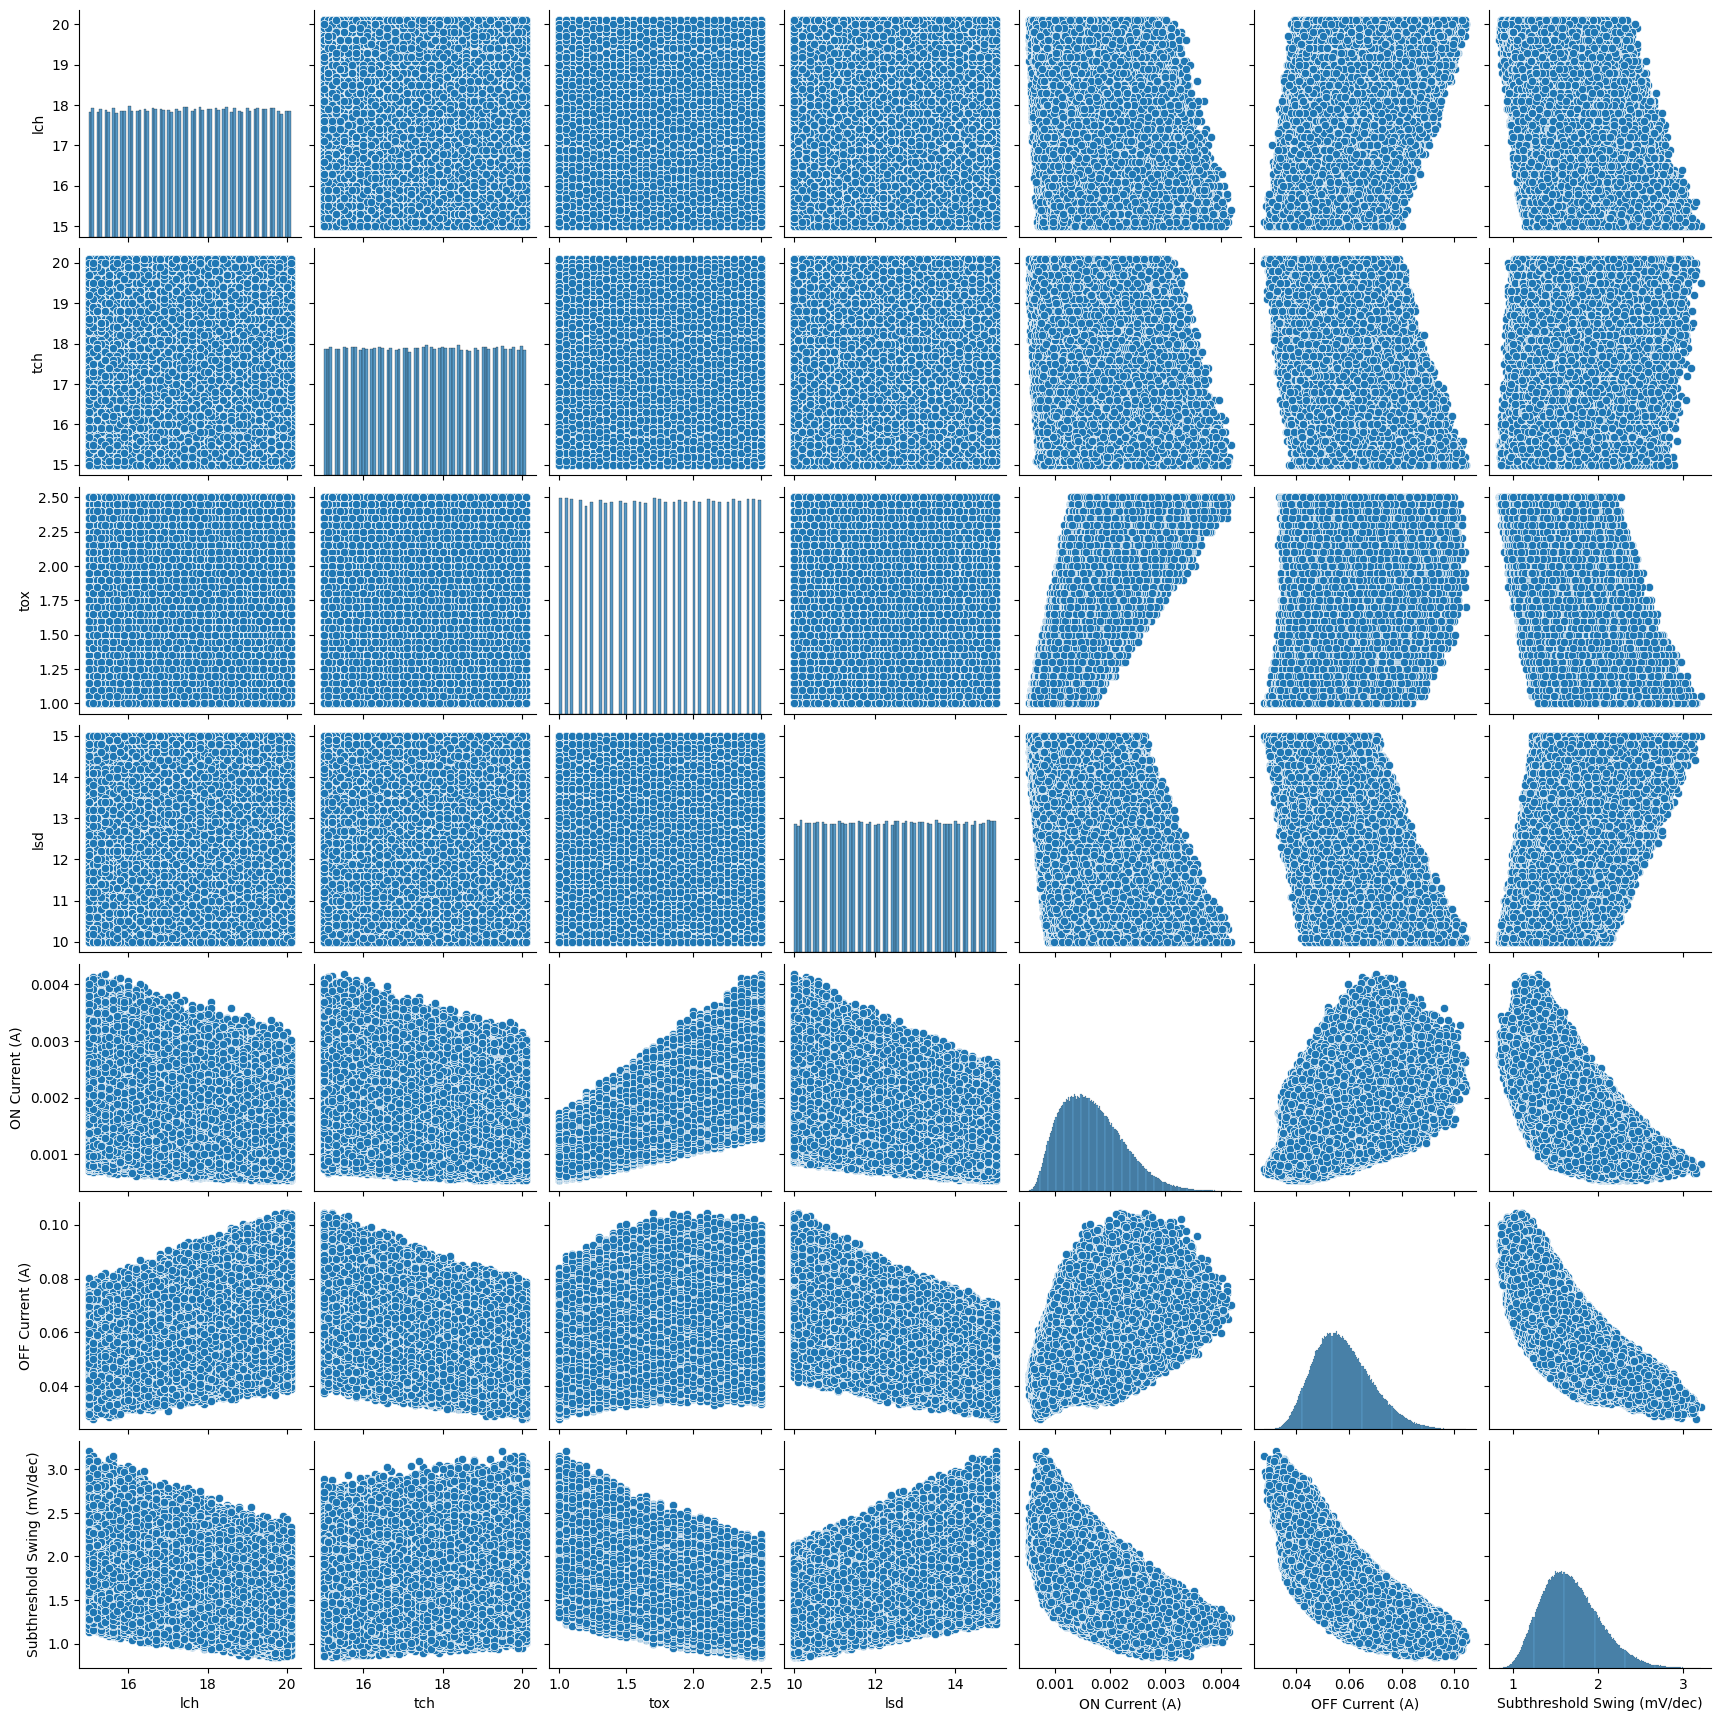

In [11]:
# Sample a fraction of the data
df_sample = df.sample(frac=0.1, random_state=42)  # 10% sample
sns.pairplot(df_sample)
plt.show()

In [12]:
# Define features (X) and target variables (y)
X = df[['lch', 'tch', 'tox', 'lsd']]
y_on_current = df['ON Current (A)']
y_off_current = df['OFF Current (A)']
y_subthreshold_swing = df['Subthreshold Swing (mV/dec)']

In [13]:
# Split the data into training and testing sets for ON current prediction
X_train, X_test, y_train_on, y_test_on = train_test_split(X, y_on_current, test_size=0.2, random_state=42)
X_train, X_test, y_train_off, y_test_off = train_test_split(X, y_off_current, test_size=0.2, random_state=42)
X_train, X_test, y_train_sub, y_test_sub = train_test_split(X, y_subthreshold_swing, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
# Initialize and train Random Forest Regressor for ON current
rfr_on = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rfr_on.fit(X_train, y_train_on)

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [16]:
# Initialize and train Random Forest Regressor with limited tree depth
rfr_off = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rfr_off.fit(X_train, y_train_off)

rfr_sub = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rfr_sub.fit(X_train, y_train_sub)


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred_on = rfr_on.predict(X_test)
y_pred_off = rfr_off.predict(X_test)
y_pred_sub = rfr_sub.predict(X_test)

# Evaluate ON current prediction
mse_on = mean_squared_error(y_test_on, y_pred_on)
r2_on = r2_score(y_test_on, y_pred_on)

# Evaluate OFF current prediction
mse_off = mean_squared_error(y_test_off, y_pred_off)
r2_off = r2_score(y_test_off, y_pred_off)

# Evaluate Subthreshold Swing prediction
mse_sub = mean_squared_error(y_test_sub, y_pred_sub)
r2_sub = r2_score(y_test_sub, y_pred_sub)

print(f"ON current - MSE: {mse_on}, R2: {r2_on}")
print(f"OFF current - MSE: {mse_off}, R2: {r2_off}")
print(f"Subthreshold Swing - MSE: {mse_sub}, R2: {r2_sub}")



ON current - MSE: 1.4361843544757326e-08, R2: 0.9523271951533705
OFF current - MSE: 1.362440107775521e-05, R2: 0.8847910912025646
Subthreshold Swing - MSE: 0.011467143977521577, R2: 0.897314353755043


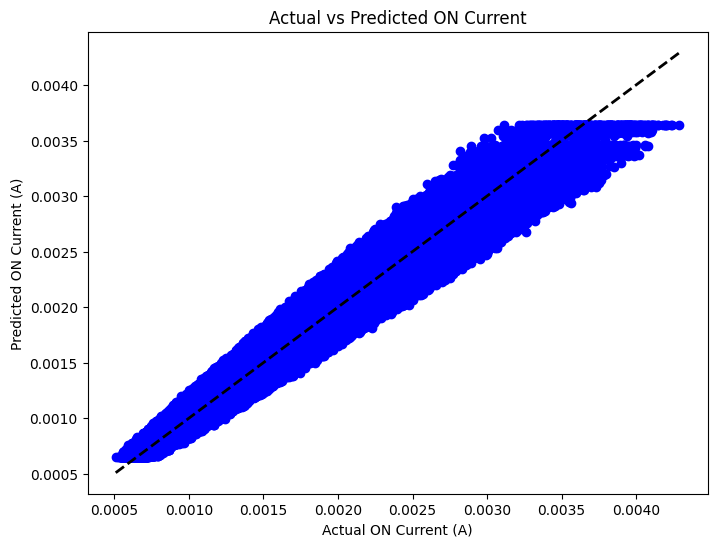

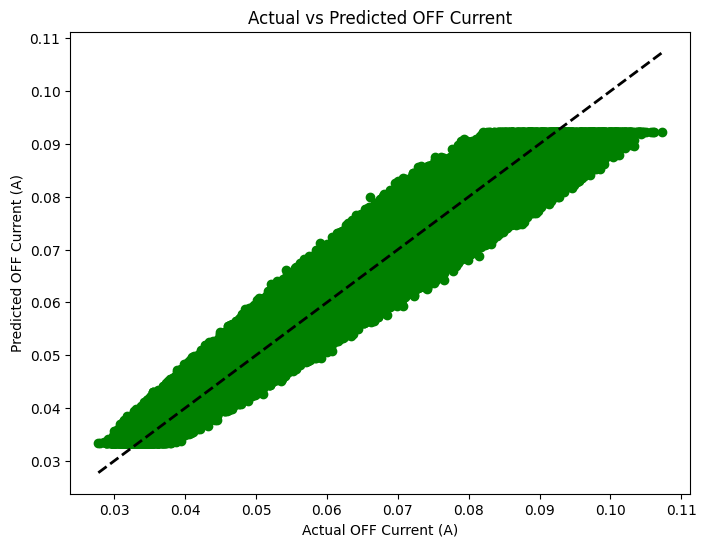

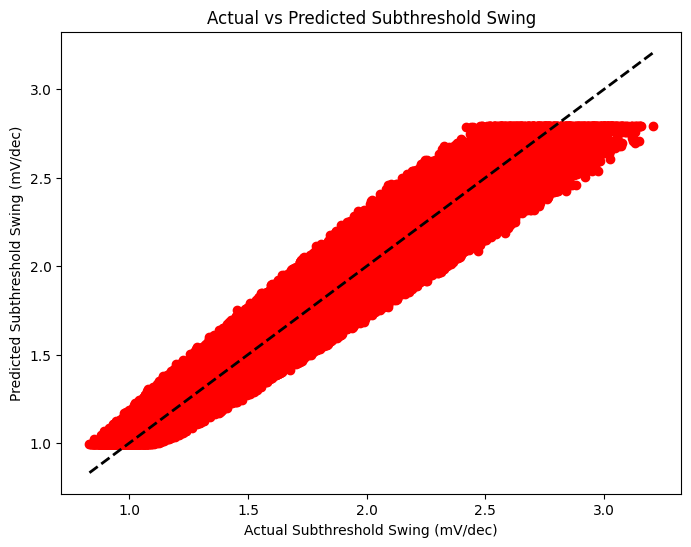

In [20]:
# Plotting the actual vs predicted ON current values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_on, y_pred_on, color='blue')
plt.plot([y_test_on.min(), y_test_on.max()], [y_test_on.min(), y_test_on.max()], 'k--', lw=2)
plt.xlabel('Actual ON Current (A)')
plt.ylabel('Predicted ON Current (A)')
plt.title('Actual vs Predicted ON Current')
plt.show()

# Plotting the actual vs predicted OFF current values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_off, y_pred_off, color='green')
plt.plot([y_test_off.min(), y_test_off.max()], [y_test_off.min(), y_test_off.max()], 'k--', lw=2)
plt.xlabel('Actual OFF Current (A)')
plt.ylabel('Predicted OFF Current (A)')
plt.title('Actual vs Predicted OFF Current')
plt.show()

# Plotting the actual vs predicted Subthreshold Swing values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_sub, y_pred_sub, color='red')
plt.plot([y_test_sub.min(), y_test_sub.max()], [y_test_sub.min(), y_test_sub.max()], 'k--', lw=2)
plt.xlabel('Actual Subthreshold Swing (mV/dec)')
plt.ylabel('Predicted Subthreshold Swing (mV/dec)')
plt.title('Actual vs Predicted Subthreshold Swing')
plt.show()


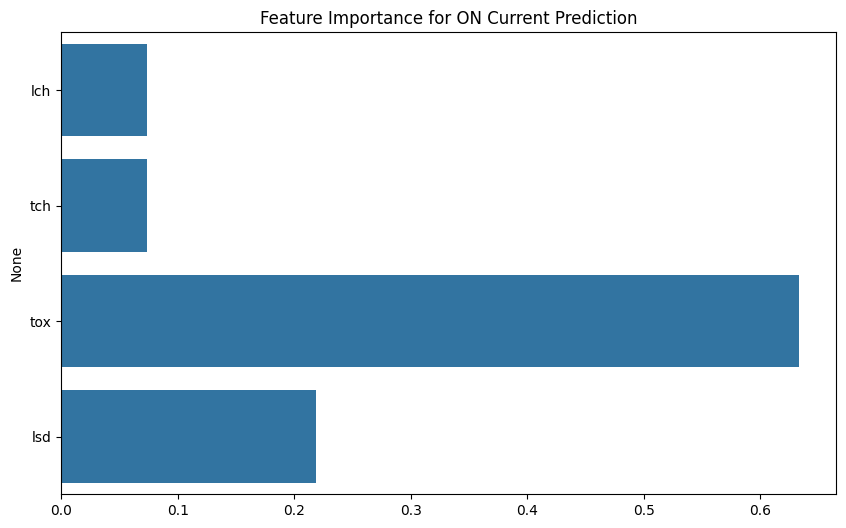

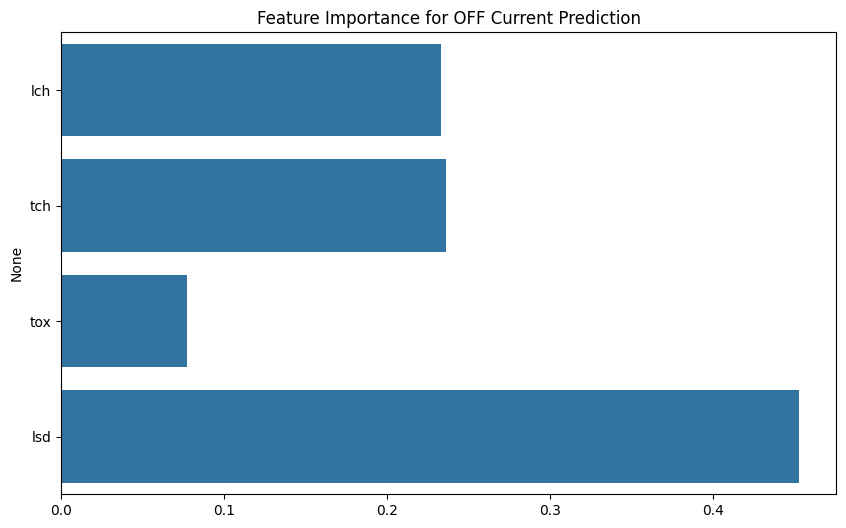

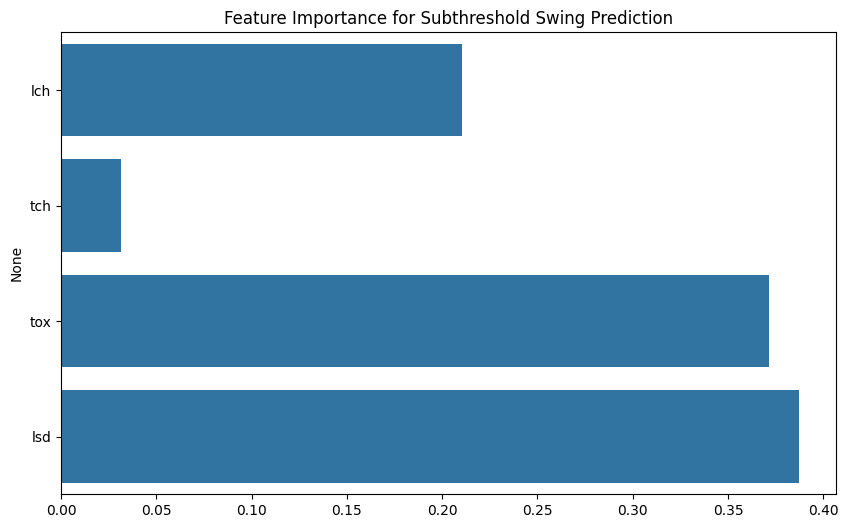

In [21]:
# Feature importance for ON current prediction
importance_on = rfr_on.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_on, y=feature_names)
plt.title('Feature Importance for ON Current Prediction')
plt.show()

# Feature importance for OFF current prediction
importance_off = rfr_off.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_off, y=feature_names)
plt.title('Feature Importance for OFF Current Prediction')
plt.show()

# Feature importance for Subthreshold Swing prediction
importance_sub = rfr_sub.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_sub, y=feature_names)
plt.title('Feature Importance for Subthreshold Swing Prediction')
plt.show()


In [23]:
print(df.columns)

Index(['lch', 'tch', 'tox', 'lsd', 'ON Current (A)', 'OFF Current (A)',
       'Subthreshold Swing (mV/dec)'],
      dtype='object')
